In [1]:
import numpy as np
import spiceypy as sp
import sympy as sym
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp

In [2]:
#Initial orbital elements and position vector
a_i = 1;
mu = 1;
e_i = 0.5;
i_i = 45 * np.pi/180;
omega_i = 0;
w_i = 0;
w_per = 0.01;
M_i = 0;
E_0 = M_i;
g = 1;
itr = 0;
while np.abs(g) > 1e-10:
    g = E_0 - e_i*np.sin(E_0) - M_i;
    dg_dE = 1 - e_i*np.cos(E_0);
    E_i = E_0 - g/dg_dE;
    E_0 = E_i;
    itr = itr + 1;
print('E_i ='), print(E_i)
H_am_i = (mu*a_i*(1-e_i**2))**0.5;
print('H_am_i ='), print(H_am_i)
r_P_i = a_i*(1-e_i);
print('r_P_i ='), print(r_P_i)
f_i = 2*math.atan(((1+e_i)/(1-e_i))**0.5 * np.tan(E_i/2));
print('f_i ='), print(f_i)
theta_i = w_i + f_i;
print('theta_i ='), print(theta_i)
R_i = (H_am_i**2/mu)/(1 + e_i*np.cos(f_i));
print('R_i ='), print(R_i)
r1_i = R_i*(np.cos(theta_i)*np.cos(omega_i) - np.cos(i_i)*np.sin(omega_i)*np.sin(theta_i));
r2_i = R_i*(np.cos(theta_i)*np.sin(omega_i) + np.cos(i_i)*np.cos(omega_i)*np.sin(theta_i));
r3_i = R_i*(np.sin(i_i)*np.sin(theta_i));
r_i = np.array([r1_i,r2_i,r3_i]);
print('r_i ='), print(r_i)
L_0 = np.sqrt(mu*a_i);
print('L_0 ='), print(L_0)
G_0 = L_0*np.sqrt(1 - e_i**2);
print('G_0 ='), print(G_0)
H_0 = G_0*np.cos(i_i);
print('H_0 ='), print(H_0)
l_0 = M_i;
print('l_0 ='), print(l_0)
g_0 = w_i;
print('g_0 ='), print(g_0)
h_0 = omega_i + w_i;
print('h_0 ='), print(h_0)
H_D = -(1/(2* L_0**2)) + w_per*H_0;
print('H_D ='), print(H_D)

E_i =
0.0
H_am_i =
0.8660254037844386
r_P_i =
0.5
f_i =
0.0
theta_i =
0.0
R_i =
0.49999999999999994
r_i =
[0.5 0.  0. ]
L_0 =
1.0
G_0 =
0.8660254037844386
H_0 =
0.6123724356957946
l_0 =
0
g_0 =
0
h_0 =
0
H_D =
-0.49387627564304204


(None, None)

In [3]:
#Finding the position over 100 Time Units (TUs) from the orbital elements
rv = [];
t_iter = 0;
for i in range(0,1000,1):
    L = L_0;
    H = H_0;
    G = G_0 - H*t_iter;
    l = t_iter/(L**3) + l_0;
    g = g_0;
    h = w_per*t_iter + h_0;
    a = L**2/mu;
    GL = G/L;
    if GL > 1:
        GL = 1;
    if GL < -1:
        GL = -1;
    e = np.sqrt(1 - (GL)**2);
    HG = H/G;
    if HG > 1:
        HG = 1;
    if HG < -1:
        HG = -1;
    i = np.arccos(HG);
    M = l;
    w = g;
    omega = h;
    rp = a*(1-e);
    orb_elem = np.array([rp,e,i,omega,w,M,t_iter,mu]);
    rv.append(np.append(sp.conics(orb_elem,t_iter),i));
    t_iter += 0.1;
rv = np.array(rv);
rv

array([[ 0.5       ,  0.        ,  0.        , ...,  1.22474487,
         1.22474487,  0.78539816],
       [ 0.377013  ,  0.1474714 ,  0.12543249, ...,  1.40203125,
         1.19604527,  0.70607984],
       [ 0.18380113,  0.31985218,  0.22003019, ...,  1.21382615,
         0.83764281,  0.60310513],
       ...,
       [ 0.35964113,  0.57027277, -0.738544  , ...,  0.6165722 ,
         0.67412851,  1.58097091],
       [ 0.3978214 ,  0.62937267, -0.66755387, ...,  0.55693226,
         0.74449212,  1.58096057],
       [ 0.43191389,  0.68225784, -0.58989375, ...,  0.49164839,
         0.80741703,  1.58095025]])

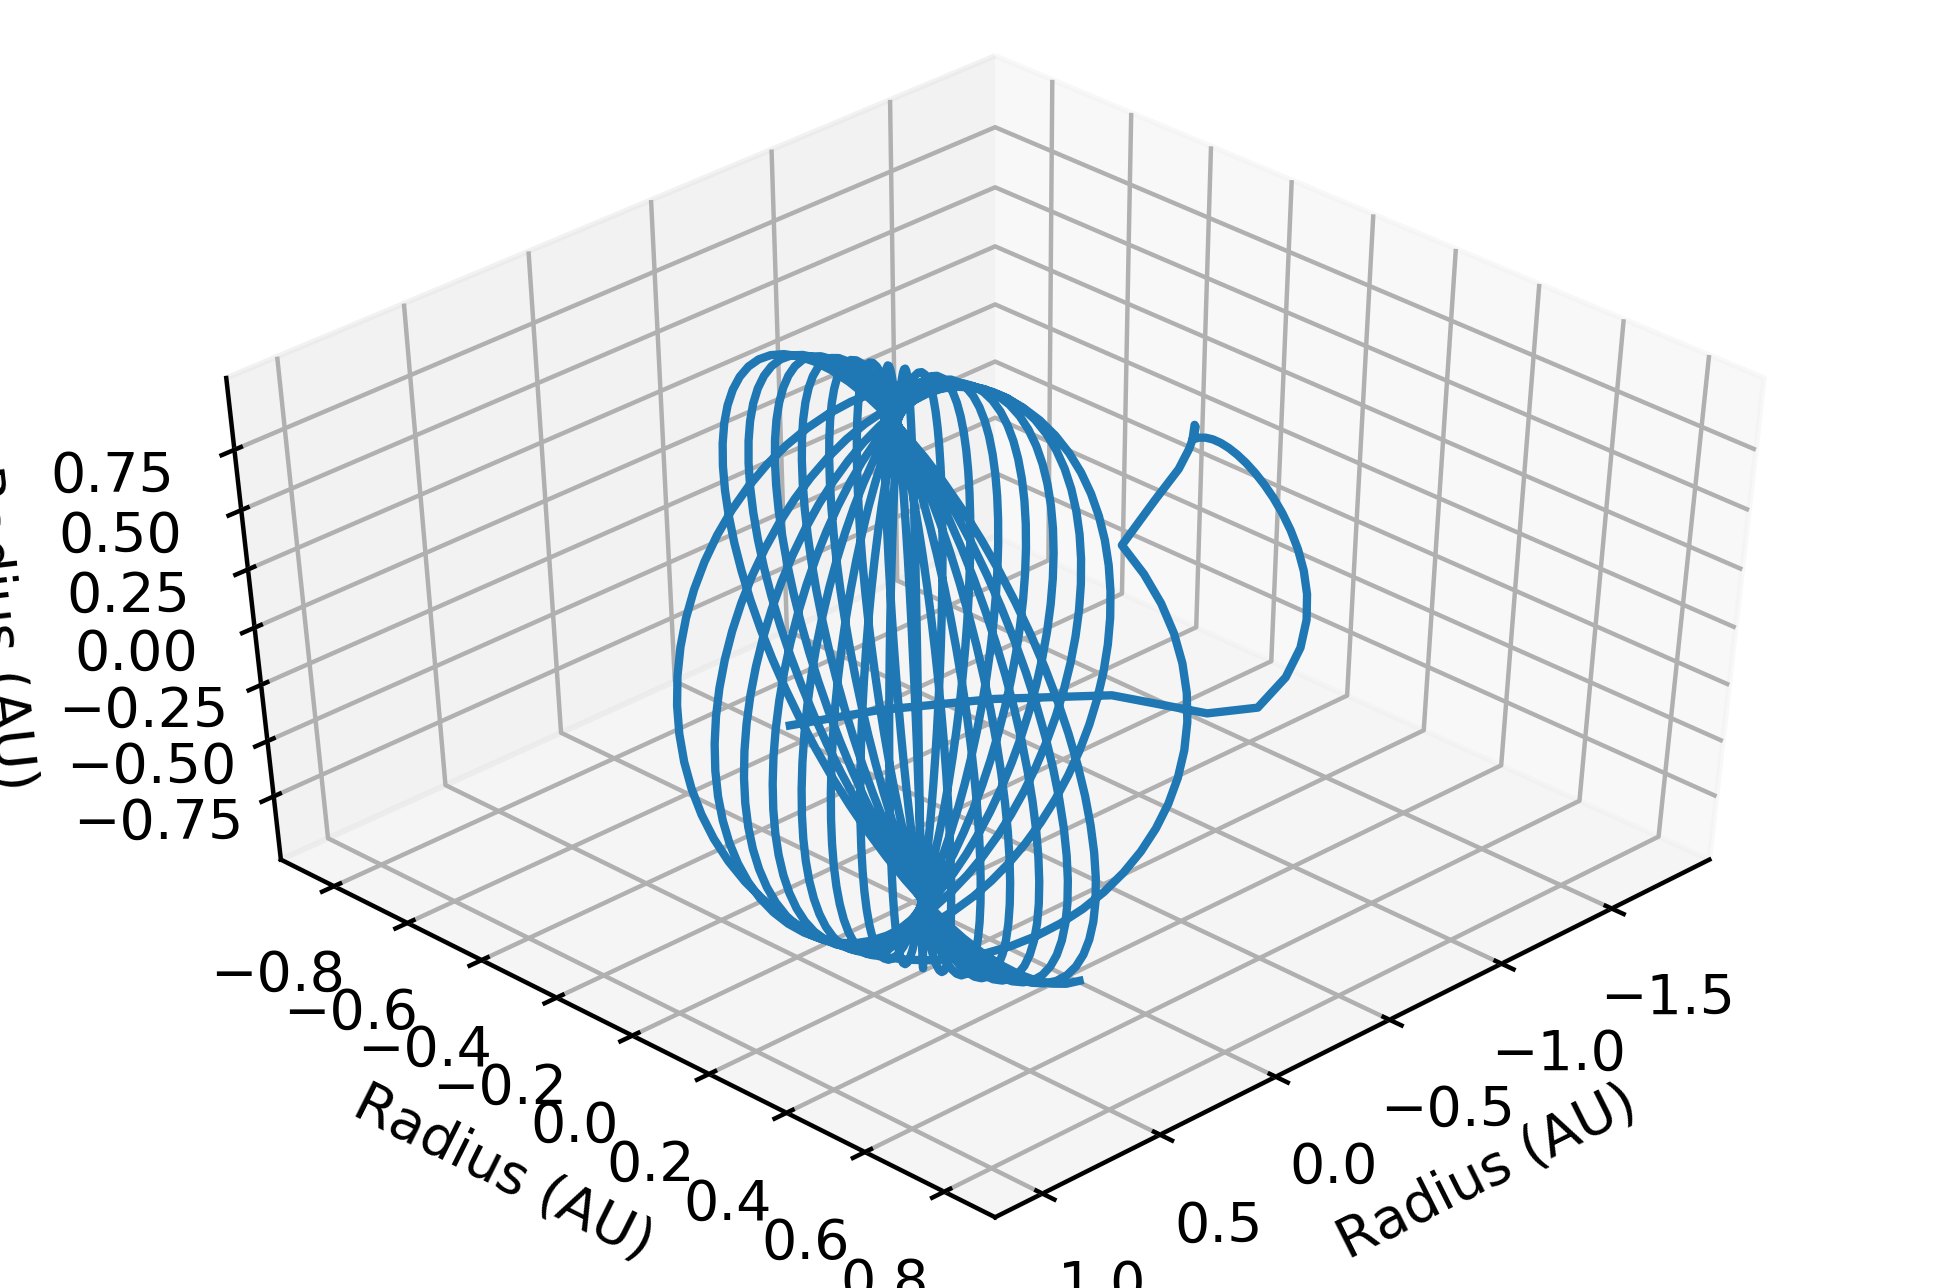

In [4]:
#Plotting the orbit
fig = plt.figure(dpi=400)
ax = plt.axes(projection='3d')
ax.plot3D(rv[:,0],rv[:,1],rv[:,2])
ax.view_init(45,45)
ax.set_xlabel('Radius (AU)')
ax.set_ylabel('Radius (AU)')
ax.set_zlabel('Radius (AU)')
plt.savefig('orbit.png')